## Exercises - Analytics Functions

Let us take care of the exercises related to analytics functions. We will be using HR database for the same.

* Get all the employees who is making more than average salary with in each department.
* Get cumulative salary for one of the department along with department name.
* Get top 3 paid employees with in each department by salary (use dense_rank)
* Get top 3 products sold in the month of 2014 January by revenue.
* Get top 3 products in each category sold in the month of 2014 January by revenue.

### Prepare HR Database

Run the following scripts to prepare the HR database.

`/data/hr_db/create_tables_mssql.sql`

`/data/hr_db/load_data_mssql`

Validate to ensure that data is available in the tables by running these queries.

### Exercise 1

Get all the employees who is making more than average salary with in each department.

* Use HR database employees and department tables for this problem.
* Compute average salary expense for each department and get those employee details who are making more salary than average salary.
* Make sure average salary expense per department is rounded off to 2 decimals.
* Output should contain employee_id, department_name, salary and avg_salary_expense (derived field).
* Data should be sorted in ascending order by department_id and descending order by salary.

|employee_id|department_name|salary|avg_salary_expense|
|---|---|---|---|
|201|Marketing|13000.00|9500.00|
|114|Purchasing|11000.00|4150.00|
|121|Shipping|8200.00|3475.56|
|120|Shipping|8000.00|3475.56|
|122|Shipping|7900.00|3475.56|
|123|Shipping|6500.00|3475.56|
|124|Shipping|5800.00|3475.56|
|184|Shipping|4200.00|3475.56|
|185|Shipping|4100.00|3475.56|
|192|Shipping|4000.00|3475.56|
|193|Shipping|3900.00|3475.56|
|188|Shipping|3800.00|3475.56|
|137|Shipping|3600.00|3475.56|
|189|Shipping|3600.00|3475.56|
|141|Shipping|3500.00|3475.56|
|103|IT|9000.00|5760.00|
|104|IT|6000.00|5760.00|
|145|Sales|14000.00|8955.88|
|146|Sales|13500.00|8955.88|
|147|Sales|12000.00|8955.88|
|168|Sales|11500.00|8955.88|
|148|Sales|11000.00|8955.88|
|174|Sales|11000.00|8955.88|
|149|Sales|10500.00|8955.88|
|162|Sales|10500.00|8955.88|
|156|Sales|10000.00|8955.88|
|150|Sales|10000.00|8955.88|
|169|Sales|10000.00|8955.88|
|170|Sales|9600.00|8955.88|
|163|Sales|9500.00|8955.88|
|151|Sales|9500.00|8955.88|
|157|Sales|9500.00|8955.88|
|158|Sales|9000.00|8955.88|
|152|Sales|9000.00|8955.88|
|100|Executive|24000.00|19333.33|
|108|Finance|12000.00|8600.00|
|109|Finance|9000.00|8600.00|
|205|Accounting|12000.00|10150.00|

```sql

with employee_avg AS (
	SELECT
		employee_id,
		department_id,
		salary,
		AVG(salary) OVER (
			PARTITION BY department_id
		) avg_salary_expense
	FROM employees
)

SELECT
	employee_id,
	d.department_name,
	salary,
	CAST(avg_salary_expense AS DECIMAL(18,2)) avg_salary_expense
FROM employee_avg e
JOIN departments d ON d.department_id = e.department_id
WHERE e.salary > e.avg_salary_expense
ORDER BY e.department_id, e.salary desc;

```
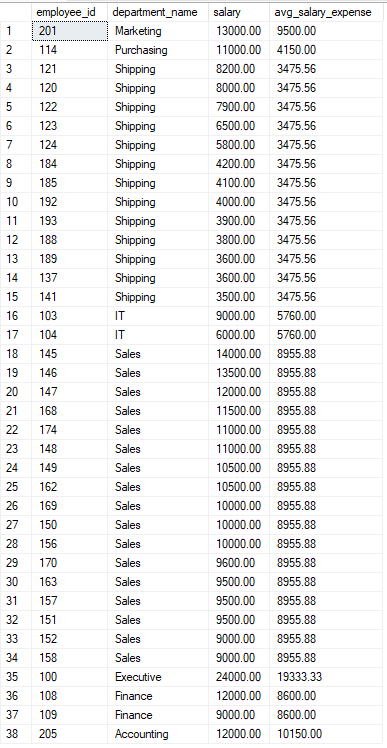

### Exercise 2

Get cumulative salary with in each department for Finance and IT department along with department name.

* Use HR database employees and department tables for this problem.
* Compute cumulative salary expense for **Finance** as well as **IT** departments with in respective departments.
* Make sure cumulative salary expense per department is rounded off to 2 decimals.
* Output should contain employee_id, department_name, salary and cum_salary_expense (derived field).
* Data should be sorted in ascending order by department_name and then salary.

|employee_id|department_name|salary|cum_salary_expense|
|---|---|---|---|
|113|Finance|6900.00|6900.00|
|111|Finance|7700.00|14600.00|
|112|Finance|7800.00|22400.00|
|110|Finance|8200.00|30600.00|
|109|Finance|9000.00|39600.00|
|108|Finance|12000.00|51600.00|
|107|IT|4200.00|4200.00|
|106|IT|4800.00|9000.00|
|105|IT|4800.00|13800.00|
|104|IT|6000.00|19800.00|
|103|IT|9000.00|28800.00|

```sql

SELECT
	e.employee_id,
	d.department_name,
	e.salary,
	SUM(e.salary) OVER (
		PARTITION BY e.department_id
		ORDER BY salary
	) cum_salary_expense
FROM employees e
JOIN departments d ON d.department_id = e.department_id
WHERE d.department_name in ('Finance', 'IT')
ORDER BY department_name, salary;

```

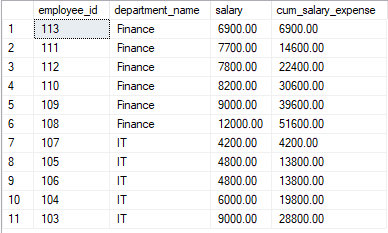

### Exercise 3

Get top 3 paid employees with in each department by salary (use dense_rank)

* Use HR database employees and department tables for this problem.
* Highest paid employee should be ranked first.
* Output should contain employee_id, department_id, department_name, salary and employee_rank (derived field).
* Data should be sorted in ascending order by department_id in ascending order and then salary in descending order.

|employee_id|department_id|department_name|salary|employee_rank|
|---|---|---|---|---|
|200|10|Administration|4400.00|1|
|201|20|Marketing|13000.00|1|
|202|20|Marketing|6000.00|2|
|114|30|Purchasing|11000.00|1|
|115|30|Purchasing|3100.00|2|
|116|30|Purchasing|2900.00|3|
|203|40|Human Resources|6500.00|1|
|121|50|Shipping|8200.00|1|
|120|50|Shipping|8000.00|2|
|122|50|Shipping|7900.00|3|
|103|60|IT|9000.00|1|
|104|60|IT|6000.00|2|
|105|60|IT|4800.00|3|
|106|60|IT|4800.00|3|
|204|70|Public Relations|10000.00|1|
|145|80|Sales|14000.00|1|
|146|80|Sales|13500.00|2|
|147|80|Sales|12000.00|3|
|100|90|Executive|24000.00|1|
|101|90|Executive|17000.00|2|
|102|90|Executive|17000.00|2|
|108|100|Finance|12000.00|1|
|109|100|Finance|9000.00|2|
|110|100|Finance|8200.00|3|
|205|110|Accounting|12000.00|1|
|206|110|Accounting|8300.00|2|

```sql

SELECT * FROM employees;
SELECT * FROM departments;

SELECT * FROM (
	SELECT
		employee_id,
		e.department_id,
		department_name,
		salary,
		DENSE_RANK() OVER (
			PARTITION BY e.department_id
			ORDER BY salary DESC
		) employee_rank
	FROM employees e
	JOIN departments d ON d.department_id = e.department_id
) nq
WHERE nq.employee_rank <= 3
ORDER BY department_id, salary desc;

```

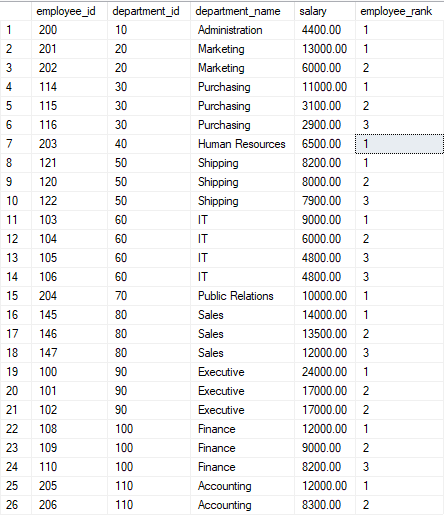

### Exercise 4

Get top 3 products sold in the month of 2014 January by revenue.

* Use retail database tables such as orders, order_items and products.
* Consider only those orders which are either in **COMPLETE** or **CLOSED** status.
* Highest revenue generating product should come at top.
* Output should contain product_id, product_name, revenue, product_rank. **revenue** and **product_rank** are derived fields.
* Data should be sorted in descending order by revenue.

|product_id|product_name|revenue|product_rank|
|---|---|---|---|
|1004|Field & Stream Sportsman 16 Gun Fire Safe|250787.46|1|
|365|Perfect Fitness Perfect Rip Deck|151474.75|2|
|957|Diamondback Women's Serene Classic Comfort Bi|148190.12|3|


```sql

SELECT TOP 3
	nq.*,
	RANK() OVER (
		ORDER BY revenue DESC
	) product_rank
FROM (
	SELECT 
		p.product_id,
		p.product_name,
		CAST(SUM(oi.order_item_subtotal) AS DECIMAL(18,2)) revenue
	FROM orders o
	JOIN order_items oi ON oi.order_item_order_id = o.order_id
	JOIN products p ON p.product_id = oi.order_item_product_id
	WHERE MONTH(order_date) = 1 AND YEAR(order_date)=2014
		AND order_status in ('COMPLETE','CLOSED')
	GROUP BY p.product_id, p.product_name
) nq;

```

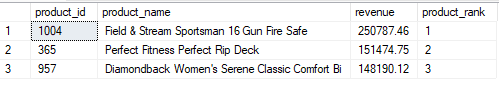

### Exercise 5

Get top 3 products sold in the month of 2014 January under selected categories by revenue. The categories are **Cardio Equipment** and **Strength Training**.

* Use retail database tables such as orders, order_items, products as well as categories.
* Consider only those orders which are either in **COMPLETE** or **CLOSED** status.
* Highest revenue generating product should come at top.
* Output should contain category_id, category_name, product_id, product_name, revenue, product_rank. revenue and product_rank are derived fields.
* Data should be sorted in ascending order by category_id and descending order by revenue.

|category_id|category_name|product_id|product_name|revenue|product_rank|
|---|---|---|---|---|---|
|9|Cardio Equipment|191|Nike Men's Free 5.0+ Running Shoe|132286.77|1|
|9|Cardio Equipment|172|Nike Women's Tempo Shorts|870.00|2|
|10|Strength Training|208|SOLE E35 Elliptical|1999.99|1|
|10|Strength Training|203|GoPro HERO3+ Black Edition Camera|1199.97|2|
|10|Strength Training|216|Yakima DoubleDown Ace Hitch Mount 4-Bike Rack|189.00|3|

```sql

WITH product_rev AS (
	SELECT
		c.category_id,
		c.category_name,
		p.product_id,
		p.product_name,
		CAST(SUM(oi.order_item_subtotal) AS DECIMAL(18,2)) revenue
	FROM orders o
	JOIN order_items oi ON oi.order_item_order_id = o.order_id
	JOIN products p ON p.product_id = oi.order_item_product_id
	JOIN categories c ON c.category_id = p.product_category_id
	WHERE MONTH(order_date) = 1 AND YEAR(order_date)=2014
		AND order_status in ('COMPLETE','CLOSED')
		AND category_id in (9,10)
	GROUP BY c.category_id, c.category_name, p.product_id, p.product_name
)
SELECT 
	*,
	RANK() OVER (
		PARTITION BY category_id
		ORDER BY revenue DESC
	) product_rank
FROM product_rev
ORDER BY category_id, revenue DESC;

```

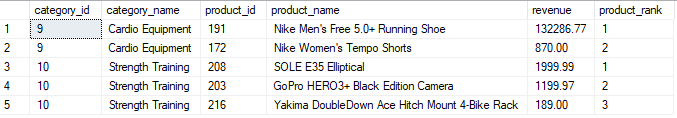